## Interact with Webcam or Video File
連結：https://pythonprogramming.net/loading-images-python-opencv-tutorial/

學習：  
本節可以了解最基本的利用cv2來讀取照片，顯示照片，並且了解讀取之後的照片格式為numpy.ndarray，後續可以利用這個概念來做區域切片取樣。

函數：
* 照片讀取
    * cv2.imread(路徑, 讀入色彩格式)
* 檢閱照片
    * cv2.imshow(名稱, 照片)
* 關閉照片
    * cv2.waitKey(0) 任意鍵關閉
    * cv2.destroyAllWindows() 關閉所有視窗

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

IMREAD_GRAYSCALE:0，灰值圖  
IMREAD_COLOR:1，RGB  
IMREAD_UNCHANGED:-1，不變

In [32]:
#  img = cv2.imread('watch.jpg', 0)
img = cv2.imread('watch.jpg', cv2.IMREAD_GRAYSCALE)

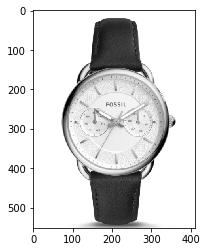

In [9]:
plt.imshow(img, cmap='gray')
plt.show()

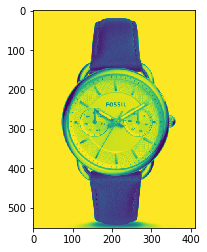

In [7]:
#  opencv讀入的格式為BGR，matplotlib讀入為RBG，有點差異
plt.imshow(img)
plt.show()

也可以利用`cv2.imshow`來顯示圖片，但是必需設置`cv2.waitKey`與`cv2.destroyAllWindows()`   
如果沒有按下任意鍵來關閉視窗的話，程序似乎會卡住等待。

In [4]:
cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

如果想保存照片的話可以利用`cv2.imwrite(格名, 物件)`

In [11]:
cv2.imwrite('hello_watch.jpg', img)

True

## Loading Video Source OpenCV Python Tutorial
https://pythonprogramming.net/loading-video-python-opencv-tutorial/

學習：  
本節可以學習到利用cv2來取得webcam連結，並透過webcam來做記錄，延伸應用可以利用webcam來做物體偵測。

函數：
* 取得webcam
    * cv2.VideoCapture()
* 色彩轉換
    * cv2.cvtColor(照片, 轉格格式)
* 影像錄製
    * cv2.VideoWriter_fourcc(編碼方式)
    * cv2.VideoWriter(檔案名稱, 編碼方式, fps, 影片大小, 是否彩色) 

In [12]:
#  0代表第一個webcam，如果有多個的話就可以設置1、2、...
cap = cv2.VideoCapture(0)

#  設置保存影像
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (648, 480))
while True:
    #  true/false, 擷取到的影像
    ret, frame = cap.read()
    
    #  將圖像轉成灰值圖
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #  保存影片
    out.write(frame)
    
    #  設置兩個imshow可以一次顯示兩個框架
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)
    
    #  設置迴歸中斷點
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break()
        
        
#  資源釋放    
cap.release()
out.release()
cv2.destroyAllWindows()

## Drawing and Writing on Image OpenCV Python Tutorial
https://pythonprogramming.net/drawing-writing-python-opencv-tutorial/

學習：  
利用opencv在圖片上畫上直線、方框、加入文字...等。

函數：
* 畫直線
    * cv2.line(來源照片, 起始座標, 結束座標, 顏色, 線粗)    
* 畫方框
    * cv2.rectangle(來源照片, 左上角座標, 右下角座標, 顏色, 線粗)  
* 畫圖
    * cv2.circle(來源照片, 中心點, 半徑, 顏色, 線粗)  
* 畫多邊形
    * cv2.polylines(來源照片, [座標點], bool(圖形是否封閉), 顏色, 線粗)  
* 加入文字
    * cv2.putText(來源照片, 說明文字, 座標, 字形, 字體大小, 顏色, 線粗, 線類別)

註一：顏色為BGR，非RGB  
註二：線粗設置-1為填滿，多邊形無法填滿  
註三：文字字體大小可以設置小數點

In [35]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)

#  畫直線
cv2.line(img, (0, 0), (150, 150), (0, 255, 0), 15)


cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)
#  畫框
cv2.rectangle(img, (10,10), (100,100), (0, 0, 0), 1)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)
#  畫圓
cv2.circle(img, (50, 50), 20, (0, 0, 0), -1)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)

#  設置多邊形座標
pts = np.array([[10, 5], [20, 30], [30, 40], [40, 45], [50,10]])
#  多邊形
cv2.polylines(img, [pts], True, (0,0,0), 1)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
#  圖片上設置文字說明
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)
#  設置字形
font = cv2.FONT_HERSHEY_SIMPLEX
#  建議使用cv2.LINE_AA，字體線較為清晰
cv2.putText(img, 'Hello CV!', (30, 50), font, 1, (255, 0, 0), 1, cv2.LINE_AA)
cv2.putText(img, 'Hello CV!', (30, 80), font, 1, (255, 0, 0), 1, cv2.LINE_8)
cv2.putText(img, 'Hello CV!', (30, 110), font, 1, (255, 0, 0), 1, cv2.LINE_4)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image Operations OpenCV Python Tutorial
https://pythonprogramming.net/image-operations-python-opencv-tutorial/

學習：  
照片讀入之後所取得的陣列即為`numpy.ndarray`格式，也因此可以做切片般操作來取得某個pixel，或是某個照片區域，取得的照片區域也可以利用'cv2.imwrite'來另存。

函數：
* 保存圖片
    * cv2.imwrite(格案名稱, 來源)

In [14]:
#  載入需求套件
import numpy as np
import cv2

#  讀入照片
img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)

In [7]:
#  取得某個座標上的顏色
px = img[100, 200]
#  如同操作list般，你也可以直接變更這個px的值
img[100, 200] = [0, 0, 0]

print(px)

[0 0 0]


In [9]:
#  照片讀入之後，是一個numpy ndarray的格式
type(img)

numpy.ndarray

In [10]:
#  對照片做區域選擇
roi = img[100:200, 200:400]
cv2.imshow('img', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
cv2.imwrite('watch_roi.jpg', roi)

True

In [12]:
#  或是直接將整個照片區域性的調整顏色
img[100:200, 200:400]=[255, 255, 255]
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
#  區域複製，先利用roi取得區域像素值之後，再重新賦值給img
#  注意選擇區域大小與貼上區域大小要相同

roi = img[100:200, 200:400]
img[0:100, 0:200] = roi
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image arithmetics and Logic OpenCV Python Tutorial
https://pythonprogramming.net/image-arithmetics-logic-python-opencv-tutorial/

學習：  
利用兩張大小相同的照片來做操作，圖片取自pythonprogran.net，此節課程可以比較直接兩張大小相同的照片相加與利用`cv2.add`及其它opencv內置的相加操作的差異性。  
另外也會了解利用閥值`cv2.threshold`來做前後背景的二值化，再透過邏輯計算的方式來將前後景合併在一起。

函數：  
* 照片合併
    * cv2.add(照片1, 照片2)  
    * cv2.addWeighted(照片1, 權重比, 照片2, 權重比, gamma)  
* 閥值二值化
    * cv2.threshold(照片, 閥值, 二值化結果的最大值, 二值化操作類別)
        * 二值化操作類別可以參考[阿洲說明](http://monkeycoding.com/?p=593)
* 邏輯計算
    * cv2.bitwise_not(照片) 
        * 將照片做not，二值化的照片會反轉黑白效果
    * cv2.bitwise_and(照片1, 照片2, mask=遮罩)
        * 將兩張照片做and

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('cv_course_pic1.jpg')
img2 = cv2.imread('cv_course_pic2.jpg')
img3 = cv2.imread('cv_course_pic3.jpg')

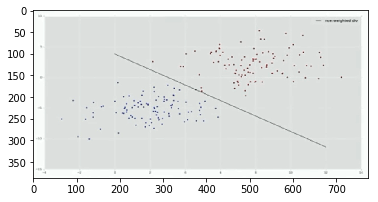

In [26]:
plt.imshow(img1)

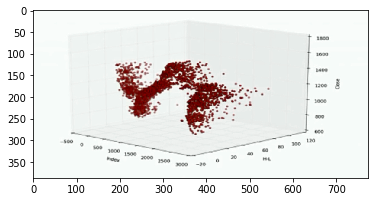

In [27]:
plt.imshow(img2)

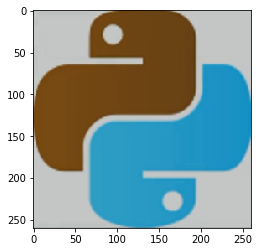

In [28]:
plt.imshow(img3)

In [17]:
#  確認兩張圖的大小要一致
#  直接相加的情況下會發現，兩張照片疊視效果不是很好
add = img1+img2
cv2.imshow('add', add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
#  改利用cv2.add
#  當pixel值大於255的時候，就會直接以255來記錄，整個背就白了
add = cv2.add(img1, img2)
cv2.imshow('add', add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
#  利用cv2.addWeighted來加入權重與gamma調控
weight = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
cv2.imshow('weight', weight)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [97]:
#  將logo置入img1的左上角
#  imshow再依需求取消註解觀看圖片變化
#  取得logo的大小
# cv2.imshow('img3', img3)
# cv2.imshow('img2', img2)
rows, cols, channels = img3.shape
#  依logo大小取img1的左上角
roi = img2[0:rows, 0:cols]
# cv2.imshow('roi', roi)
#  圖片轉灰值
img3gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
#  設置閥值，過閥值為0(黑)，低於則為255(白)
ret, mask = cv2.threshold(img3gray, 190, 255, cv2.THRESH_BINARY_INV)
# cv2.imshow('mask', mask)
mask_inv = cv2.bitwise_not(mask)
# cv2.imshow('mask_inv', mask_inv)
img2_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
# cv2.imshow('img2_bg', img2_bg)
img3_fg = cv2.bitwise_and(img3,img3, mask=mask)
# cv2.imshow('img3_fg', img3_fg)
dst = cv2.add(img2_bg, img3_fg)
# cv2.imshow('dst', dst)
img2[0:rows, 0:cols] = dst
cv2.imshow('img22', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Thresholding OpenCV Python Tutorial
https://pythonprogramming.net/thresholding-image-analysis-python-opencv-tutorial/

學習：  
原始照片是一張黑黑的幾乎看不到內容的書本內容，以`cv2.threshold`來調整似乎還是無法有效的讓內容還原，因為`cv2.threshold`是單純的自己這個pixel去轉變，透過`cv2.adaptiveThreshold`以區域的方式來計算還原，可以得到更好的效果。

函數：
* cv2.adaptiveThreshold(照片, 最大值, 區域閥值計算方式, 二值化類型, 多少pixel一個區域, 計算閥值的時候要減掉的值)
    * 需注意到照片必需為單通道的照片(rgb為三通道)

參考來源：[阿洲的程式教學](http://monkeycoding.com/?p=603)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

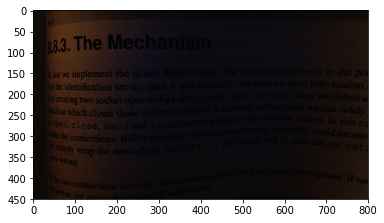

In [8]:
img = cv2.imread('bookpage.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

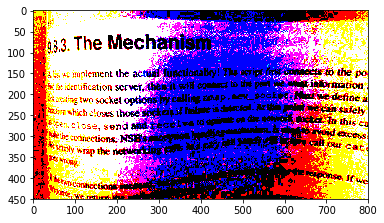

In [14]:
#  透過cv2.threshold來將低於閥值的pixel做處理
#  執行之後可以發現照片紅藍紫綠，這是因為我們沒有將照片做二值化或灰階處理
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('original', img)
cv2.imshow('threshold', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))

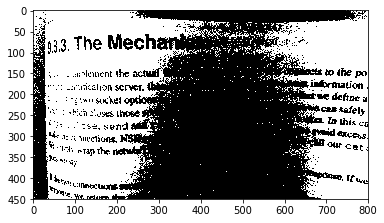

In [13]:
#  重新以灰度圖處理
#  重新產生圖面已經是黑白效果，但是中間的文字是一片黑的不清不楚
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(img_gray, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('original', img)
cv2.imshow('threshold', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(threshold, cmap='gray')

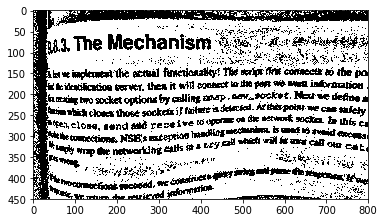

In [15]:
#  改以adaptiveThreshold來應用其它的閥值設置，可以看的出來文字內容了
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaus = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('threshold', gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(gaus, cmap='gray')